In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install locationtagger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import snscrape.modules.twitter as sntwitter
import pandas as pd

# query = "earthquake (help OR stuck) (#earthquake)"
# tweets =[]
# limit = 10
# for tweet in sntwitter.TwitterSearchScraper(query).get_items():

#    # print(vars(tweet))
#     #break
#     if len(tweets) == limit:
#       break
#     else:
#       tweets.append([tweet.date,tweet.user.username,tweet.rawContent, tweet.user.location])
# df= pd.DataFrame(tweets,columns=['Date','User','Tweet','Location'])

df=pd.read_csv('/content/tweet.csv')
x=list(df['Location'])
y=[
  "Syria",
  "Turkey",
  "Syria",
  "Turkey",
  "Turkiye",
  "Turkey",
  "Syria",
  "Turkey",
  "Syria",
  "Turkey"
]

df.drop(df.columns[0], axis=1, inplace=True)
# df.to_csv(r'D:\New folder\tweets.csv', sep=',', index=False)
# dataf=pd.read_csv(r'D:\New folder\tweets.csv',encoding='latin-1')
df


,Date,User,Tweet,Location
0,2023-03-15 17:45:53+00:00,LastQuake,Help us keep doing what we've always done: inf...,"based in Paris, works globally"
1,2023-03-15 16:42:26+00:00,ami_choudhury,The Walk 4 Hope\n\nPlease donate generously no...,"Bedfordshire, England, UK"
2,2023-03-15 16:37:17+00:00,FOURPAWSUSA,#Earthquake Update: FOUR PAWS has entered Syri...,"Boston, MA"
3,2023-03-15 16:16:37+00:00,KaftVolter,#deprem #diyarbakir #sanliurfa #hatay #kahrama...,Anıttepe
4,2023-03-15 15:03:32+00:00,ICATinsurance,2022 brought about 18 weather disasters that c...,"Broomfield, CO"
5,2023-03-15 15:01:17+00:00,baitulmaal,#Baitulmaal donors enabled $5.35M in emergency...,"Irving, Texas"
6,2023-03-15 14:50:01+00:00,Micailic0Mica,@Beyefendiyimyav @haydarozkan06 @suleymansoylu...,United Kingdom
7,2023-03-15 14:00:02+00:00,hayatyolu_en,Ramadan is coming🕋🌙\nWe are still working hard...,"Istanbul, Turkey"
8,2023-03-15 13:16:00+00:00,TurkeyPulse,Will #Turkey's multibillion-dollar #earthquake...,NaN
9,2023-03-15 13:10:02+00:00,brightly_one,Tip from OneBrightlyCyber: #Scammers take adva...,Entire United States


In [ ]:
df.shape

(11, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      11 non-null     object
 1   User      11 non-null     object
 2   Tweet     11 non-null     object
 3   Location  9 non-null      object
dtypes: object(4)
memory usage: 480.0+ bytes


No null values in any of the column so going for visualization

In [ ]:
#counts number of charcters in each tweet
def get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)
df['char_counts'] = df['Tweet'].apply(lambda x: get_charcounts(x))
print(df['char_counts'])

0     242
1     249
2     244
3     207
4     231
5     268
6     291
7     258
8     100
9     261
10    254
Name: char_counts, dtype: int64


<ipython-input-14-143cd0dfb27f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['char_counts'])


<Axes: xlabel='char_counts', ylabel='Density'>

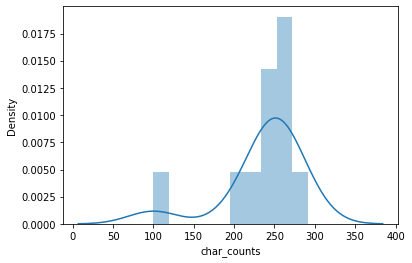

In [ ]:
#plot a graph showing the distribution for the number of characters for tweets
import seaborn as sns
sns.distplot(df['char_counts'])


<ipython-input-15-78add2f2fefd>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['char_counts'], shade= True)


<Axes: xlabel='char_counts', ylabel='Density'>

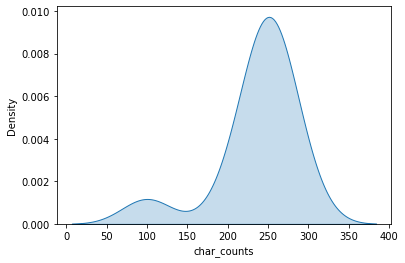

In [ ]:
sns.kdeplot(df['char_counts'], shade= True)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
def _get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l
df['stopwords_counts'] = df['Tweet'].apply(lambda x: _get_stopwords_counts(x))
print(df['stopwords_counts'])

0     13
1      7
2     13
3      3
4     13
5      4
6     17
7     13
8      0
9     10
10    10
Name: stopwords_counts, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-17-65239790400c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['stopwords_counts'],shade=True)


<Axes: xlabel='stopwords_counts', ylabel='Density'>

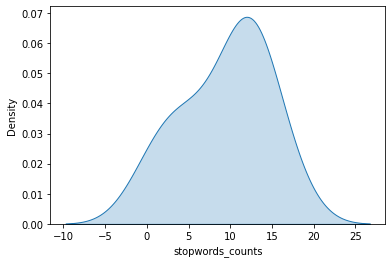

In [ ]:
sns.kdeplot(df['stopwords_counts'],shade=True)

In [ ]:
#Most and Least command words

In [ ]:
import re
str = re.sub(r'[^\w]',' ',df.Tweet[1] ).replace("_"," ")
print(str)

The Walk 4 Hope  Please donate generously now on the link  below to help us help those affected by this terrible situation    https   t co cjsPO3r3ji   hrf  fundraising  donation  syria  turkey  lebanon  earthquake  victim  affected  food  shelter  clothing  help https   t co VIcstKgvUm


In [ ]:
#getting frequency of each words occured in all the Tweets in decreasing order
wordfreq={}
def get_word_freq(text):
  words = text.split()
  wfreq=[words.count(w) for w in words]
  for word in words:
    if word not in wordfreq:
          wordfreq[word] = 0 
    wordfreq[word] += 1

for i in range(0,10):
  get_word_freq(df.iloc[i]['Tweet'])
print(wordfreq)
wordfreq= sorted(wordfreq.items(), key=lambda x:x[1],reverse=True)
print(wordfreq)

{'Help': 1, 'us': 3, 'keep': 1, 'doing': 1, 'what': 1, "we've": 1, 'always': 1, 'done:': 1, 'inform': 1, 'and': 7, 'reassure': 1, 'citizens': 1, 'living': 1, 'in': 7, '#earthquake-prone': 1, 'regions': 1, 'stand': 1, 'side-by-side': 1, 'with': 1, 'affected': 2, 'population': 1, 'case': 1, 'of': 4, 'an': 1, '#earthquake🙏': 1, 'If': 1, 'you': 3, 'can,': 1, 'consider': 1, 'a': 3, 'donation': 1, 'to': 14, 'https://t.co/6Cc7sj0zpP': 1, 'Thank': 1, 'you💟': 1, 'https://t.co/aC6hcoj6EP': 1, 'The': 1, 'Walk': 1, '4': 1, 'Hope': 1, 'Please': 1, 'donate': 2, 'generously': 1, 'now': 1, 'on': 1, 'the': 9, 'link👇🏻below': 1, 'help': 10, 'those': 1, 'by': 3, 'this': 2, 'terrible': 1, 'situation🙏🏻': 1, 'https://t.co/cjsPO3r3ji': 1, '#hrf': 1, '#fundraising': 1, '#donation': 1, '#syria': 1, '#turkey': 1, '#lebanon': 1, '#earthquake': 7, '#victim': 1, '#affected': 1, '#food': 1, '#shelter': 1, '#clothing': 1, '#help': 1, 'https://t.co/VIcstKgvUm': 1, '#Earthquake': 1, 'Update:': 1, 'FOUR': 1, 'PAWS': 1, 

In [ ]:
print(type(wordfreq))

<class 'list'>


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

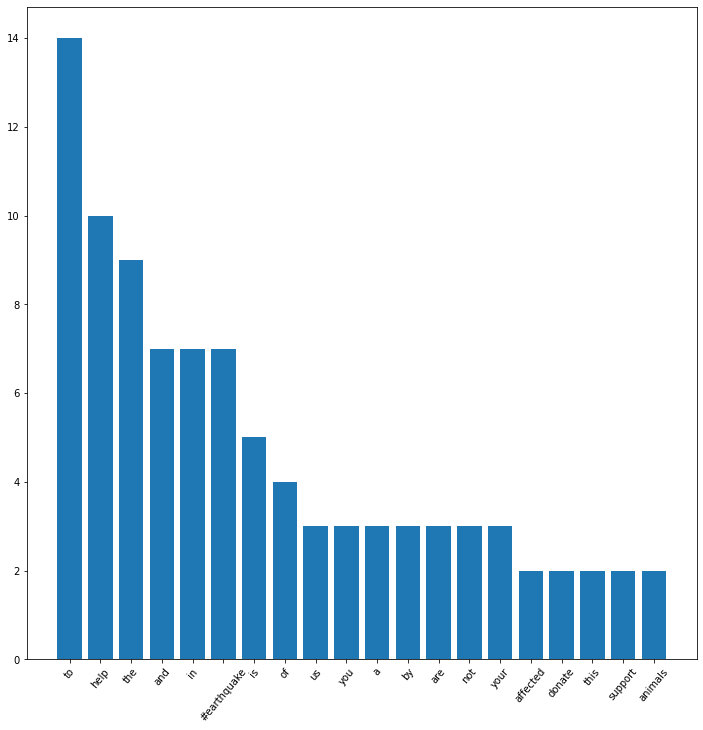

In [ ]:
#bar plot for 20 most common words
words=[]
wordfreqs=[]
for i in range(0,20):
  words.append(wordfreq[i][0])
  wordfreqs.append(wordfreq[i][1])
plt.figure(figsize=(12,12))
plt.bar(words, wordfreqs)
plt.xticks(rotation=50)
plt.show()

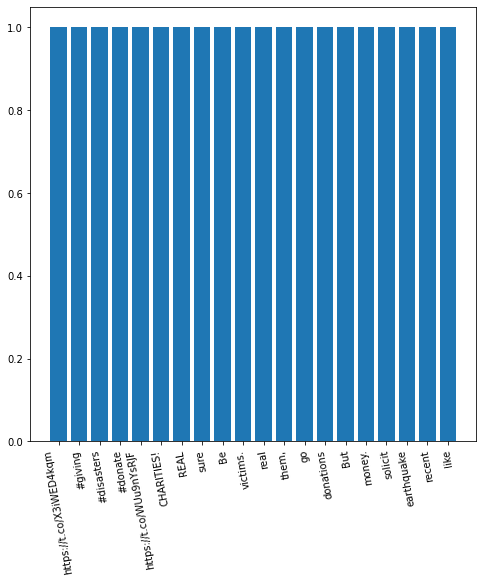

In [ ]:
#bar plot for 20 most common words
words=[]
wordfreqs=[]
for i in range(len(wordfreq)-1,len(wordfreq)-21,-1):
  words.append(wordfreq[i][0])
  wordfreqs.append(wordfreq[i][1])
plt.figure(figsize=(8,8))
plt.bar(words, wordfreqs)
plt.xticks(rotation=100)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_ngram(df, col, ngram_range):
	vectorizer = CountVectorizer(ngram_range=(ngram_range, ngram_range))
	vectorizer.fit_transform(df[col])
	ngram = vectorizer.vocabulary_
	ngram = sorted(ngram.items(), key = lambda x: x[1], reverse=True)

	return ngram
bigram = get_ngram(df,'Tweet', ngram_range=2)

In [ ]:
bigram[:20]

[('землетрясение menschen', 363),
 ('your support', 362),
 ('your peace', 361),
 ('your greatest', 360),
 ('your donations', 359),
 ('you https', 358),
 ('you have', 357),
 ('you donate', 356),
 ('you didn', 355),
 ('you can', 354),
 ('xquhjj0mg1 https', 353),
 ('wuu9nysrjf donate', 352),
 ('working under', 351),
 ('working hard', 350),
 ('with affected', 349),
 ('will turkey', 348),
 ('why did', 347),
 ('what we', 346),
 ('weather disasters', 345),
 ('we ve', 344)]

In [ ]:
#storing all the tweet as a single string
words=""
for i in range(0,len(wordfreq)):
  words+=wordfreq[i][0]
words

"tohelptheandin#earthquakeisofusyouabyarenotyouraffecteddonatethissupportanimalsworkingasaboutdisastershaverightaid#Turkey#Syria#charitythey#dogssurvivorsHelpkeepdoingwhatwe'vealwaysdone:informreassurecitizensliving#earthquake-proneregionsstandside-by-sidewithpopulationcasean#earthquake🙏Ifcan,considerdonationhttps://t.co/6Cc7sj0zpPThankyou💟https://t.co/aC6hcoj6EPTheWalk4HopePleasegenerouslynowonlink👇🏻belowthoseterriblesituation🙏🏻https://t.co/cjsPO3r3ji#hrf#fundraising#donation#syria#turkey#lebanon#victim#affected#food#shelter#clothing#helphttps://t.co/VIcstKgvUm#EarthquakeUpdate:FOURPAWShasenteredSyriaofferimpactednaturaldisaster.Ourteam,ledDrAmirKhalil,underhighpressuremanypossibleshorttimeavailable.https://t.co/VGWUSrMjNWhttps://t.co/JY8GCtXrZR#deprem#diyarbakir#sanliurfa#hatay#kahramanmaras#Gaziantep#Osmaniye#adana#ADIYAMAN#Malatya#HelpTurkey#Erdbeben#землетрясениеMenschensterben,Hilfeistnichtgenugpeopledyingenough#btc#coin2022brought18weatherthatcausedover$1billiondamages.ICATherep

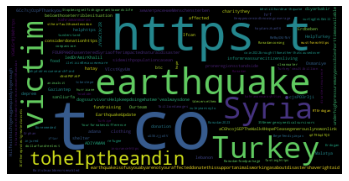

In [ ]:
#printing wordcloud for the tweets
from wordcloud import WordCloud 
word_cloud = WordCloud(max_font_size=80).generate(words)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]    

True

In [ ]:
df.head()

,Date,User,Tweet,Location,char_counts,stopwords_counts
0,2023-03-15 17:45:53+00:00,LastQuake,Help us keep doing what we've always done: inf...,"based in Paris, works globally",242,13
1,2023-03-15 16:42:26+00:00,ami_choudhury,The Walk 4 Hope\n\nPlease donate generously no...,"Bedfordshire, England, UK",249,7
2,2023-03-15 16:37:17+00:00,FOURPAWSUSA,#Earthquake Update: FOUR PAWS has entered Syri...,"Boston, MA",244,13
3,2023-03-15 16:16:37+00:00,KaftVolter,#deprem #diyarbakir #sanliurfa #hatay #kahrama...,Anıttepe,207,3
4,2023-03-15 15:03:32+00:00,ICATinsurance,2022 brought about 18 weather disasters that c...,"Broomfield, CO",231,13


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline

nlp = pipeline("ner", model="bert-base-cased")


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [ ]:
import spacy
import re
!python3 -m spacy download xx_ent_wiki_sm


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-26 10:59:39.291324: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-26 10:59:39.291401: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-26 10:59:39.291414: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
# Load necessary libraries
import spacy
import re
from geopy.geocoders import Nominatim

# Load pre-trained BERT model and tokenizer
nlp = spacy.load('en_core_web_sm')

# Define example text
text = "I have lived in Delhi united States,Delhi united States, Germany and Berlin,Delhi united States, Connecticut. Also visited Paris, Rome and Mumbai."

# Extract entities using spacy NER
geolocator = Nominatim(user_agent="my_app")
city_country_pairs = {}
doc = nlp(text)
for ent in doc.ents:
    if ent.label_ == 'GPE':
        city = ent.text
        if city in city_country_pairs:
            continue
        try:
            # Get location information of city using geopy
            location = geolocator.geocode(city)
            country = location.raw['display_name'].split(",")[-1].strip()
        except:
            country = 'unknown'
        city_country_pairs[city] = country

# Print extracted city-country pairs
if city_country_pairs:
    print("Cities and their countries:")
    for city, country in city_country_pairs.items():
        print(f"{city}: {country}")
else:
    print("No cities found in text.")


Cities and their countries:
Delhi united States: United States
Germany: Deutschland
Berlin: Deutschland
Connecticut: United States
Paris: France
Rome: Italia
Mumbai: India


In [ ]:
import spacy
from spacy import displacy 
!python3 -m spacy download xx_ent_wiki_sm
!pip install IPython

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-26 11:00:44.859508: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-26 11:00:44.860314: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-26 11:00:44.860333: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
dataf=df
dataf=dataf.dropna()


In [ ]:
dataf=dataf.reset_index()
dataf


,index,Date,User,Tweet,Location,char_counts,stopwords_counts
0,0,2023-03-15 17:45:53+00:00,LastQuake,Help us keep doing what we've always done: inf...,"based in Paris, works globally",242,13
1,1,2023-03-15 16:42:26+00:00,ami_choudhury,The Walk 4 Hope\n\nPlease donate generously no...,"Bedfordshire, England, UK",249,7
2,2,2023-03-15 16:37:17+00:00,FOURPAWSUSA,#Earthquake Update: FOUR PAWS has entered Syri...,"Boston, MA",244,13
3,3,2023-03-15 16:16:37+00:00,KaftVolter,#deprem #diyarbakir #sanliurfa #hatay #kahrama...,Anıttepe,207,3
4,4,2023-03-15 15:03:32+00:00,ICATinsurance,2022 brought about 18 weather disasters that c...,"Broomfield, CO",231,13
5,5,2023-03-15 15:01:17+00:00,baitulmaal,#Baitulmaal donors enabled $5.35M in emergency...,"Irving, Texas",268,4
6,6,2023-03-15 14:50:01+00:00,Micailic0Mica,@Beyefendiyimyav @haydarozkan06 @suleymansoylu...,United Kingdom,291,17
7,7,2023-03-15 14:00:02+00:00,hayatyolu_en,Ramadan is coming🕋🌙\nWe are still working hard...,"Istanbul, Turkey",258,13
8,9,2023-03-15 13:10:02+00:00,brightly_one,Tip from OneBrightlyCyber: #Scammers take adva...,Entire United States,261,10


In [ ]:
j=0
for i in dataf['User']:
  dataf['Tweet'][j]= re.sub(r'[^\w]',' ',dataf['Tweet'][j] ).replace("_"," ")
  dataf['Location'][j]= re.sub(r'[^\w]',' ',dataf['Location'][j]).replace("_"," ")
  j=j+1
dataf.head() 

<ipython-input-38-871a5a5c753b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['Tweet'][j]= re.sub(r'[^\w]',' ',dataf['Tweet'][j] ).replace("_"," ")
<ipython-input-38-871a5a5c753b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['Location'][j]= re.sub(r'[^\w]',' ',dataf['Location'][j]).replace("_"," ")


,index,Date,User,Tweet,Location,char_counts,stopwords_counts
0,0,2023-03-15 17:45:53+00:00,LastQuake,Help us keep doing what we ve always done inf...,based in Paris works globally,242,13
1,1,2023-03-15 16:42:26+00:00,ami_choudhury,The Walk 4 Hope Please donate generously now ...,Bedfordshire England UK,249,7
2,2,2023-03-15 16:37:17+00:00,FOURPAWSUSA,Earthquake Update FOUR PAWS has entered Syri...,Boston MA,244,13
3,3,2023-03-15 16:16:37+00:00,KaftVolter,deprem diyarbakir sanliurfa hatay kahrama...,Anıttepe,207,3
4,4,2023-03-15 15:03:32+00:00,ICATinsurance,2022 brought about 18 weather disasters that c...,Broomfield CO,231,13


In [ ]:
def punctuation_removal(df):
    df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
    df['Location'] = df['Location'].str.replace('[^\w\s]','')
    print(df['Tweet'].head())
    print(df['Location'].head())
punctuation_removal(dataf)

0    Help us keep doing what we ve always done  inf...
1    The Walk 4 Hope  Please donate generously now ...
2     Earthquake Update  FOUR PAWS has entered Syri...
3     deprem  diyarbakir  sanliurfa  hatay  kahrama...
4    2022 brought about 18 weather disasters that c...
Name: Tweet, dtype: object
0    based in Paris  works globally
1         Bedfordshire  England  UK
2                        Boston  MA
3                          Anıttepe
4                    Broomfield  CO
Name: Location, dtype: object


<ipython-input-39-b0335ce412a8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
<ipython-input-39-b0335ce412a8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location'] = df['Location'].str.replace('[^\w\s]','')


In [ ]:
#number of stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#removing stop words
def stop_words_removal(df):
    df['Tweet'] = df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    df['Location'] = df['Location'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    print(df['Tweet'].head())
    print(df['Location'].head())
stop_words_removal(dataf)

0    Help us keep always done inform reassure citiz...
1    The Walk 4 Hope Please donate generously link ...
2    Earthquake Update FOUR PAWS entered Syria offe...
3    deprem diyarbakir sanliurfa hatay kahramanmara...
4    2022 brought 18 weather disasters caused 1 bil...
Name: Tweet, dtype: object
0    based Paris works globally
1       Bedfordshire England UK
2                     Boston MA
3                      Anıttepe
4                 Broomfield CO
Name: Location, dtype: object


In [ ]:
punctuation_removal(dataf)


0    Help us keep always done inform reassure citiz...
1    The Walk 4 Hope Please donate generously link ...
2    Earthquake Update FOUR PAWS entered Syria offe...
3    deprem diyarbakir sanliurfa hatay kahramanmara...
4    2022 brought 18 weather disasters caused 1 bil...
Name: Tweet, dtype: object
0    based Paris works globally
1       Bedfordshire England UK
2                     Boston MA
3                      Anıttepe
4                 Broomfield CO
Name: Location, dtype: object


<ipython-input-39-b0335ce412a8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')
<ipython-input-39-b0335ce412a8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location'] = df['Location'].str.replace('[^\w\s]','')


In [ ]:
tk=[]
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
def perform_tokenization(word):
    tokens=list(set(word_tokenize(word)))
    tk.extend(tokens)
    return tokens
for i in range(0,j-1):
  dataf.iloc[i]['Tweet']=perform_tokenization(dataf.iloc[i]['Tweet'])

<ipython-input-43-c54995858912>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.iloc[i]['Tweet']=perform_tokenization(dataf.iloc[i]['Tweet'])


In [ ]:
dataf.iloc[1]['Tweet']

'The Walk 4 Hope Please donate generously link help us help affected terrible situation https co cjsPO3r3ji hrf fundraising donation syria turkey lebanon earthquake victim affected food shelter clothing help https co VIcstKgvUm'

In [ ]:
!python -m spacy download xx_ent_wiki_sm
import spacy

nlp = spacy.load('xx_ent_wiki_sm')
nlp.max_length = 2000000

# Define a list of tokens
tokens=tk

# Join the tokens into a string
text = " ".join(tokens)

# Create a spaCy Doc object from the string
doc = nlp(text)

# Extract named entities from the Doc object
entities = list(doc.ents)

# Print the named entities
for entity in entities:
    print(entity.text, entity.label_)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-26 11:01:01.453358: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-26 11:01:01.453442: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-26 11:01:01.453454: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:

locations=[]
locations.extend([[entity.text] for entity in entities if entity.label_ in ['LOC']])
df = pd.DataFrame(locations, columns=['Location'])
df

,Location
0,us aC6hcoj6EP
1,Update
2,Gaziantep
3,RWBqGXUfbV
4,Baitulmaal
5,Ramadan
6,Turkey
7,Turkiye
8,Syria
9,Ramadan


In [ ]:
tk2=[]
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
def perform_tokenization(word):
    tokens=list(set(word_tokenize(word)))
    tk2.extend(tokens)
    return tokens
for i in range(0,j-1):
  dataf.iloc[i]['Location']=perform_tokenization(dataf.iloc[i]['Location'])

<ipython-input-47-a236bd4a7ad4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.iloc[i]['Location']=perform_tokenization(dataf.iloc[i]['Location'])


In [ ]:
nlp= spacy.load('xx_ent_wiki_sm')

# Define a list of tokens
tokens=tk2

# Join the tokens into a string
text = " ".join(tokens)

# Create a spaCy Doc object from the string
doc = nlp(text)

# Extract named entities from the Doc object
entities = list(doc.ents)

# Print the named entities
for entity in entities:
    print(entity.text, entity.label_)

Paris LOC
Bedfordshire England PER
UK MA ORG
Texas LOC


In [ ]:
locations2=[]
locations2.extend([[entity.text] for entity in entities if entity.label_ in ['LOC']])
df = pd.DataFrame(locations2, columns=['Location'])
df.head()

,Location
0,Paris
1,Texas


In [ ]:
locations.extend(locations2)

In [ ]:
locations

[['us aC6hcoj6EP'],
 ['Update'],
 ['Gaziantep'],
 ['RWBqGXUfbV'],
 ['Baitulmaal'],
 ['Ramadan'],
 ['Turkey'],
 ['Turkiye'],
 ['Syria'],
 ['Ramadan'],
 ['Syria'],
 ['Paris'],
 ['Texas']]

In [ ]:
flatList = [element for innerList in locations for element in innerList]
locations=flatList
locations

['us aC6hcoj6EP',
 'Update',
 'Gaziantep',
 'RWBqGXUfbV',
 'Baitulmaal',
 'Ramadan',
 'Turkey',
 'Turkiye',
 'Syria',
 'Ramadan',
 'Syria',
 'Paris',
 'Texas']

In [ ]:
y.extend(x)
y

['Syria',
 'Turkey',
 'Syria',
 'Turkey',
 'Turkiye',
 'Turkey',
 'Syria',
 'Turkey',
 'Syria',
 'Turkey',
 'based in Paris, works globally',
 'Bedfordshire, England, UK',
 'Boston, MA',
 'Anıttepe',
 'Broomfield, CO',
 'Irving, Texas',
 'United Kingdom',
 'Istanbul, Turkey',
 nan,
 'Entire United States',
 nan]

In [ ]:
from numpy import nan
import pandas as pd
y = [item for item in y if not(pd.isnull(item)) == True]
y

['Syria',
 'Turkey',
 'Syria',
 'Turkey',
 'Turkiye',
 'Turkey',
 'Syria',
 'Turkey',
 'Syria',
 'Turkey',
 'based in Paris, works globally',
 'Bedfordshire, England, UK',
 'Boston, MA',
 'Anıttepe',
 'Broomfield, CO',
 'Irving, Texas',
 'United Kingdom',
 'Istanbul, Turkey',
 'Entire United States']

In [ ]:
lst3 = [value for value in y if value in locations]
lst3

['Syria',
 'Turkey',
 'Syria',
 'Turkey',
 'Turkiye',
 'Turkey',
 'Syria',
 'Turkey',
 'Syria',
 'Turkey']

In [ ]:
accuracy = (len(lst3)/len(y))*100
print('Accuracy is ',accuracy)

Accuracy is  52.63157894736842
